In [1]:
#Code by: Theodore Gaidis, Mark Bailey, Kritik Mirg

In [2]:
#run all modules before produce details module
#produce details function creates a map in a new browser tab, as well as graphs in this notebook.
#the graphs that analyze the entire date range take a long time, espesecially if you input USA

In [3]:
#import necessary python packages
#geocoder and folium not included with python, you may have to install for map to generate

In [4]:
import urllib
import gzip
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from map_visuals import map_visualization_state

In [5]:
#gather 2008-2018 Data, specify by year
#try/accept for local file paths vs directly from NCDC storm events database
#function to grab data from NCDC database

In [6]:
#All Storm Details
#try/except for local path
DOWNLOAD_ROOT = "https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/"

def fetch_storm_data(storm_url):
    urllib.request.urlretrieve(storm_url)
    return pd.read_csv(storm_url)

try:
    storm_details_2008 = pd.read_csv('StormEvents_details-ftp_v1.0_d2008_c20180718.csv.gz')
    storm_details_2009 = pd.read_csv('StormEvents_details-ftp_v1.0_d2009_c20180718.csv.gz')
    storm_details_2010 = pd.read_csv('StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz')
    storm_details_2011 = pd.read_csv('StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz')
    storm_details_2012 = pd.read_csv('StormEvents_details-ftp_v1.0_d2012_c20190516.csv.gz')
    storm_details_2013 = pd.read_csv('StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz')
    storm_details_2014 = pd.read_csv('StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz')
    storm_details_2015 = pd.read_csv('StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz')
    storm_details_2016 = pd.read_csv('StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz')
    storm_details_2017 = pd.read_csv('StormEvents_details-ftp_v1.0_d2017_c20190817.csv.gz')
    storm_details_2018 = pd.read_csv('StormEvents_details-ftp_v1.0_d2018_c20191116.csv.gz')
    
except:
    print("Could not recieve data from local files.  Accessing NCDC Database")
    storm_details_2008 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2008_c20180718.csv.gz')
    storm_details_2009 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2009_c20180718.csv.gz')
    storm_details_2010 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz')
    storm_details_2011 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz')
    storm_details_2012 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2012_c20190516.csv.gz')
    storm_details_2013 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz')
    storm_details_2014 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz')
    storm_details_2015 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz')
    storm_details_2016 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz')
    storm_details_2017 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2017_c20190817.csv.gz')
    storm_details_2018 = fetch_storm_data(DOWNLOAD_ROOT + 'StormEvents_details-ftp_v1.0_d2018_c20191116.csv.gz')

In [7]:
#combine 2008-2018 into one data set to be filtered by year and state
#easier to filter combined data set by year

In [8]:
#sort storm details by date
#2008
storm_details_2008 = storm_details_2008.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2009
storm_details_2009 = storm_details_2009.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2010
storm_details_2010 = storm_details_2010.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2011
storm_details_2011 = storm_details_2011.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2012
storm_details_2012 = storm_details_2012.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2013
storm_details_2013 = storm_details_2013.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2014
storm_details_2014 = storm_details_2014.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2015
storm_details_2015 = storm_details_2015.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2016
storm_details_2016 = storm_details_2016.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2017
storm_details_2017 = storm_details_2017.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])
#2018
storm_details_2018 = storm_details_2018.sort_values(['BEGIN_YEARMONTH','BEGIN_DAY'])

In [9]:
#combine into one dataframe
def combined_storm_details(storm_details_2008, storm_details_2009, storm_details_2010, storm_details_2011, storm_details_2012, storm_details_2013, storm_details_2014, storm_details_2015, storm_details_2016, storm_details_2017, storm_details_2018):
    combined_details = pd.concat([storm_details_2008, storm_details_2009, storm_details_2010, storm_details_2011, storm_details_2012, storm_details_2013, storm_details_2014, storm_details_2015, storm_details_2016, storm_details_2017, storm_details_2018])
    return combined_details.drop_duplicates()

comb_D = combined_storm_details(storm_details_2008, storm_details_2009, storm_details_2010, storm_details_2011, storm_details_2012, storm_details_2013, storm_details_2014, storm_details_2015, storm_details_2016, storm_details_2017, storm_details_2018)

In [10]:
#code below produces graph of yearly injuries

In [13]:
def weather_year(df, state, year):
    event_dic = {}
    event_list = []
    for line in df['EVENT_TYPE']: #Iterating throug specific row
        if line not in event_list:
            event_list.append(line) #Making sure there are no duplicated
            event_dic[line] = 0
        
    for line in df['EVENT_TYPE']:
        if line in event_dic:
            event_dic[line] += 1 #Adding one for each occurence
        
    event_dic = sorted(event_dic.items(), key = lambda kv:(kv[1], kv[0]))  #Sorted dicitonary by value

    occur = []
    types = []
    for key in list(reversed(list(event_dic)))[0:10]: #iterating through reversed list to get top 10
        types.append(key[0])
        occur.append(key[1])

    bars = types
    height = occur

    #Creating bar graph 
        
    plt.barh(bars, height)
    plt.title('Top 10 Weather Types in ' + state + " " + str(year))
    plt.xlabel('Occurences')
    plt.ylabel('Event Types')

    plt.show()
    
#weather_year(combined_details)

In [14]:
#death details per state for given year below

In [15]:
def year_death(df, year):
    death_details = df[["STATE", "DEATHS_INDIRECT", "DEATHS_DIRECT"]] #Getting dataframe for only these rows

    death_states_list = []
    death_dict = {}
    for index, row in death_details.iterrows(): #Iterating through dataframe
        if row['STATE'] not in death_states_list: #Making sure there are no duplicates
            death_states_list.append(row['STATE'])
            death_dict[row['STATE']] = 0


    for index, row in death_details.iterrows():
        total = row['DEATHS_INDIRECT'] + row['DEATHS_DIRECT'] #Adding values of two rows
        death_dict[row['STATE']] += total #Setting dictionary key to values of total deaths

        death_dict_sorted = sorted(death_dict.items(), key =   #Sorted dicitonary by value
             lambda kv:(kv[1], kv[0]))

    deaths = []
    death_states = []
    for key in list(reversed(list(death_dict_sorted)))[0:10]:    #iterating through reversed list to get top 10
        death_states.append(key[0])
        deaths.append(key[1])

    bars = death_states
    height = deaths
    
     #Creating bar graph 

    plt.barh(bars, height)
    plt.title('Deaths by Weather by State in ' + str(year))
    plt.xlabel('Number of Deaths')
    plt.ylabel('State')

    plt.show()
    
#year_death(combined_details)

In [16]:
#injuries over time in selected state (or USA) (all years)

In [17]:
def injuries_overTime(df, state_1):

    injury_details_year = df[["YEAR", "INJURIES_INDIRECT", "INJURIES_DIRECT"]] #Getting dataframe for only these rows

    year_list = []
    year_injury_dict = {}
    for index, row in injury_details_year.iterrows(): #Iterating through dataframe
        if row['YEAR'] not in year_list:  #Making sure there are no duplicates
            year_list.append(row['YEAR'])
            year_injury_dict[row['YEAR']] = 0


    for index, row in injury_details_year.iterrows():
        total = row['INJURIES_INDIRECT'] + row['INJURIES_DIRECT'] #Adding values of two rows
        year_injury_dict[row['YEAR']] += total  #Setting dictionary key to values of total deaths
        
    injuries_total = []
    for key in year_injury_dict:
        injuries_total.append(year_injury_dict[key]) #Appending list with keys of dictionary 

        #Creating bar graph 
    plt.plot(year_list,injuries_total)
    plt.title('Injuries by Weather Over Time in ' + state_1)
    plt.xlabel('Years')
    plt.ylabel('Number of Injuries')

    plt.show()

In [18]:
#death over time in selected state(or USA)

In [19]:
def death_overTime(df, state_1):

    death_details_year = df[["YEAR", "DEATHS_INDIRECT", "DEATHS_DIRECT"]] #Getting dataframe for only these rows

    year_death_states_list = []
    year_death_dict = {}
    for index, row in death_details_year.iterrows():  #Iterating through dataframe
        if row['YEAR'] not in year_death_states_list: #Making sure there are no duplicates
            year_death_states_list.append(row['YEAR'])
            year_death_dict[row['YEAR']] = 0


    for index, row in death_details_year.iterrows():
        total = row['DEATHS_INDIRECT'] + row['DEATHS_DIRECT'] #Adding values of two rows
        year_death_dict[row['YEAR']] += total #Setting dictionary key to values of total deaths for certain year

    death_total = []
    for key in year_death_dict:
        death_total.append(year_death_dict[key])  #Appending list with keys of dictionary 

         #Creating bar graph 

    plt.plot(year_death_states_list,death_total)
    plt.title('Death by Weather Over Time in ' + state_1)
    plt.xlabel('Years')
    plt.ylabel('Number of Death')

    plt.show()

In [20]:
#show death details

In [21]:
def state_year_details(year, state_1):
    state_detail = state_1.upper() #Making states paramter upper case to match dataframe
    
    year_detail = year
    
    death_details_year_state = comb_D[["STATE","YEAR", "DEATHS_INDIRECT", "DEATHS_DIRECT"]] #Getting dataframe for only these rows
    total_deaths = 0
    for index, row in death_details_year_state.iterrows():
        if row['YEAR'] == year_detail and row['STATE'] == state_detail: #Finding row that matches both parameters
            total_deaths += row['DEATHS_INDIRECT'] + row['DEATHS_DIRECT'] #Adding values of two rows
            
    injury_details_year_state = comb_D[["STATE","YEAR", "INJURIES_INDIRECT", "INJURIES_DIRECT"]] #Getting dataframe for only these rows
    total_injuries = 0
    for index, row in injury_details_year_state.iterrows():
        if row['YEAR'] == year_detail and row['STATE'] == state_detail: #Finding row that matches both parameters
            total_injuries += row['INJURIES_INDIRECT'] + row['INJURIES_DIRECT'] #Adding values of two rows
          
    print("The state of " + state_detail + " in the year of " + str(year_detail) + " had " + str(total_deaths) + " deaths and " + str(total_injuries) + " injuries due to weather events.")
    


In [22]:
#Run function below to produce a map and details about the state and year choosen

In [26]:
def produce_details(comb_D):
    
    year = int(input("enter a year 2008-2018: "))
    L_year = comb_D[(comb_D['YEAR'] == year)].dropna(subset=['BEGIN_LAT', 'BEGIN_LON'])
    state_1 = input("Enter the state you would like to view (or usa for entire usa) ").upper()
    state_overTime = comb_D[(comb_D['STATE'] == state_1)]
    
    #Calling functions defined above to get corresponding data
    if state_1 == 'USA': #If user enters USA
        map_visualization_state(L_year.head(3000),'USA')
        weather_year(L_year, state_1, year)
        year_death(L_year, year)
        injuries_overTime(comb_D, state_1)
        death_overTime(comb_D, state_1)
        
        
    else:
        state_all_Details = L_year[(L_year['STATE'] == state_1)]
        map_visualization_state(state_all_Details.head(3000),state_1)
        weather_year(state_all_Details, state_1, year)
        injuries_overTime(state_overTime, state_1)
        death_overTime(state_overTime, state_1)
        state_year_details(year, state_1)


enter a year 2008-2018: 2011
Enter the state you would like to view (or usa for entire usa) Texas


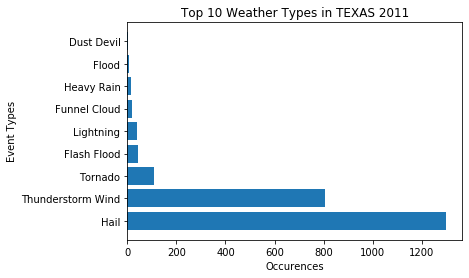

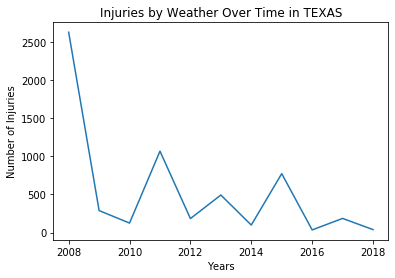

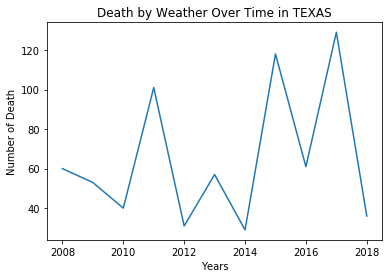

The state of TEXAS in the year of 2011 had 101 deaths and 1068 injuries due to weather events.


In [31]:
produce_details(comb_D) #Run this cell to start program